<a href="https://colab.research.google.com/github/Wpert/numerics/blob/main/LegendrePolynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Полиномы Лежандра

Говорят, что их построение идёт через ортогонализацию Грамма-Шмидта системы $L\{1, x, x^2, \dots, \}$.

Начнём же её выводить полиномы сами, перед этим введём скалярное произведение: $\langle f, g \rangle = \int_{-1}^1 f(x) g(x) dx$.

$$
g_0 = 1
\\
g_1 = x - \frac{\langle f_1, g_0 \rangle}{\langle g_0, g_0 \rangle} g_0
\\
\langle g_0, g_0 \rangle = \int_{-1}^1 1 \cdot 1 dx = x \Big|_{-1}^1 = 2
\\
\langle f_1, g_0 \rangle = \int_{-1}^1 x \cdot 1 dx = \frac{1}{2} x^2 \Big|_{-1}^1 = 0
\\
g_1 = x - \frac{0}{2} \cdot 1 = x
\\
g_2 = x^2 - \frac{\langle f_2, g_0 \rangle}{\langle g_0, g_0 \rangle} g_0 - \frac{\langle f_2, g_1 \rangle}{\langle g_1, g_1 \rangle} g_1
\\
\langle g_1, g_1 \rangle = \int_{-1}^1 x \cdot x dx = \frac{1}{3} x^3 \Big|_{-1}^1 = \frac{2}{3}
\\
\langle f_2, g_0 \rangle = \int_{-1}^1 x^2 \cdot 1 dx = \frac{1}{3} x^3 \Big|_{-1}^{1} = \frac{2}{3}
\\
\langle f_2, g_1 \rangle = \int_{-1}^1 x^2 \cdot x dx = \frac{1}{4} x^4 \Big|_{-1}^1 = 0
\\
g_2 = x^2 - \frac{1}{3} \cdot 1 - 0 \cdot \frac{3}{2} \cdot x = x^2 - \frac{1}{3}
\\
\vdots
$$

Но введенные мной многочлены не обладают интерной мерой $\|P_n\| = \sqrt{\frac{2}{2n + 1}}$ относительно введённого ранее скалярного произведения.

Определение через ДУ:
$$ (1 - x^2) P_n''(x) - 2x P_n'(x) + n(n + 1) P_n = 0 $$

Так и появилась формула Родрига, которая является решением уравнения выше:
$$ P_n = \frac{1}{2^n n!} \cdot \frac{d^n}{dx^n} \Bigl( (1 - x^2)^n \Bigr) $$

Можно инлуктивно начать брать производные от $(x^2 - 1)$, чтобы рано или поздно получить решение ДУ.

Также существует определение через генеративные функции:
$$ \frac{1}{ \sqrt{1 - 2tx + t^2} } = \sum_{n = 0}^{\infty} P_n(x) t^n $$

Ниже приведу несколько примеров этих полиномов. Можно также заметить, что те полиномы, которые мы высчитали вручную по некоторому предположению ранее отличаются лишь на константу относительно настоящих полиномов Лежандра.

$$
\begin{array}{|c|c|}
\hline
P_0 & 1 \\
P_1 & x \\
P_2 & \frac{1}{2}(3x^2 - 1) \\
P_3 & \frac{1}{2}(5x^3 - 3x) \\
P_4 & \frac{1}{8}(35x^4 - 30x^2 + 3) \\
P_5 & \frac{1}{8}(63x^5 - 70x^3 + 15x) \\
\vdots & \vdots \\
\hline
\end{array}
$$

Вообще, для вычислений полиномов импользовать определения малоэффективно, потому используют всяческие реккурентные соотношения, приведу некоторые из них:

Для вычисления самого полинома в точке:
$$
P_{n+1}(x) = \frac{2n + 1}{n + 1} x P_n(x) - \frac{n}{n + 1}P_{n - 1}(x)
$$
Либо в другой форме:
$$
P_n(x) = \frac{2n - 1}{n} x P_{n - 1}(x) - \frac{n - 1}{n} P_{n - 2}(x)
$$

А для вычисления производной:
$$
P_n'(x) = \frac{n}{1 - x^2} \Bigl( P_{n - 1} - x P_n (x) \Bigr)
\\
P_{n+1}'(x) = P_{n-1}'(x) + (2n + 1) P_n(x)
\\
P_{n+1}'(x) = (2n + 1)P_n(x) + (2(n - 2) + 1)P_{n-2}(x) + (2(n - 4) + 1)P_{n-4}(x) + \dots
$$

Давайте тогда научимся считать значения в точках Полинома Лежандра!

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import oo, pi
from typing import Tuple, List, Callable
import typing
import math as mt
from scipy import special
sp.init_printing()

# см реккур выше, можно также ускорить работу, если хранить массив выч. значений
def lpn(n: int, t: float) -> float:
  if not(-1 <= t <= 1):
    raise ValueError('t is out of range [-1, 1]')

  if n == 0:
    return 1
  elif n == 1:
    return t

  ans: float = (2 * n - 1) * t * lpn(n - 1, t) - (n - 1) * lpn(n - 2, t)
  return ans / n

def lpnTest(N: int):
  for n in range(0, N):
    x = np.random.uniform(-1, 1)
    rightValue = special.lpn(n, x)[0][-1]
    myValue = lpn(n, x)
    print(np.abs(rightValue - myValue))

# display(special.lpn(20, 0.5)[0][-1])
# display(lpn(20, 0.5))
# 1/2 (3x^2 - 1) -- roots are +-1/sqrt(3)
display(lpn(2, -1/sp.sqrt(3)))
display(lpn(2, 1/sp.sqrt(3)))
display(lpn(20, 1))
lpnTest(10)
# Не знаю имеет ли смысл замерять время работы функций

0

0

1.0

0.0
0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
0.0
2.7755575615628914e-17
2.3852447794681098e-17
0.0
2.7755575615628914e-17


2) Свойства

Давайте тогда порисуем

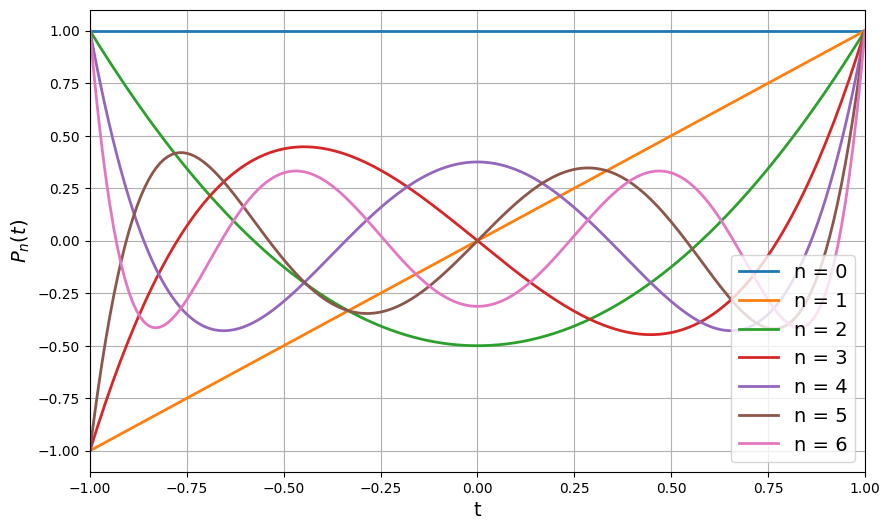

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Считаем точки
n_max = 6
x = np.linspace(-1, 1, 200)
y = np.array([special.lpn(n_max, xi)[0]  for xi in x]).T
# y = np.vectorize(special.lpn)(x).T
for n, yn in enumerate(y):
    ax.plot(x, yn, label = 'n = ' + str(n), linewidth=2)

# Наводим красоту
ax.legend(fontsize=14, loc=4)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('$P_n (t)$', fontsize=14)
ax.set_xlim(-1, 1)
ax.grid()

Сразу понятны следующие свойства:

Полиномы четной степени четные, а нечетной -- нечетные (неудивительно):
$$P_n(-x) = (-1)^n P_n*(x)$$
А также по ортогонализации понятно следующее:
$$
\langle P_n, P_m \rangle = \int_{-1}^1 P_n(x) \cdot P_m(x) dx = \frac{2}{2n + 1}\delta_{n, m}
$$
Также через [формулу Лейбница](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%9B%D0%B5%D0%B9%D0%B1%D0%BD%D0%B8%D1%86%D0%B0_(%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F)) можно достаточно просто увидеть, что:
$$P_n(1) = 1; P_n(-1) = (-1)^n$$

Почему дельта-функция понятно, а почему $\frac{2}{2n + 1}$ не очень, потому выведем:
$$
\int_{-1}^1 P_n(x) \cdot P_n(x) dx =
\int_{-1}^1 P_n^2(x) \cdot 1 dx =
\\
= xP_n^2(x) \Big|_{-1}^1 - \int_{-1}^1 x \cdot 2P_n(x) P_n'(x) dx =
$$
Вспоминаем реккурентные соотношения выше и подставляем в формулу:
$$
xP_n'(x) = P_{n+1}'(x) - (n + 1)P_n(x)
= P_n^2(1) + P_n^2(-1) - 2 \int_{-1}^1 P_n(x) (P_{n+1}'(x) - (n + 1)P_n(x)) dx=
$$
Аналогично, подставляем второе:
$$
P_{n+1}'(x) = P_{n-1}'(x) + (2n + 1) P_n(x)
\\
= 2 - 2 \int_{-1}^1 P_n(x) (P_{n-1}'(x) + (2n + 1) P_n(x) - (n + 1)P_n(x)) dx=
\\
= 2 - 2 \int_{-1}^1 P_n(x) (P_{n-1}'(x) + n P_n(x)) dx
\\
(2n + 1) \int_{-1}^1 P_n^2(x) dx = 2 - 2 \int_{-1}^1 P_n(x) P_{n-1}'(x) dx
$$
Так как производная от многочлена Лежандра выражается через сами многочлены Лежандра, то в силу ортогональности, она будет давать $0$ в скалярном произведении. Отсюда получаем, что квадрат нормы равен:
$$
\int_{-1}^1 P_n^2(x) = \frac{2}{2n + 1}
$$
Можно даже проверить это, проинтегрировав многочлены.

In [23]:
from sympy.abc import x
sp.integrate(sp.sin(x), (x, 0,2 * float(pi.evalf())))

N = 5

for n in range(N):
  contents = []
  for m in range(N):
    limits = (x, -1, 1)
    expr = sp.legendre_poly(n, x) * sp.legendre_poly(m, x)
    contents.append(sp.integrate(expr, limits) )
  contents = list(map(str, contents))
  display(" ".join(contents))

'2 0 0 0 0'

'0 2/3 0 0 0'

'0 0 2/5 0 0'

'0 0 0 2/7 0'

'0 0 0 0 2/9'

Таким образом можно получить ортонормированные полиномоы Лежандра, но это довольно скучное занятие.

Куда интереснее раскладывать функции в функциональынй ряд. Например, любая кусочно-гладкая функция на отрезке $[-1, 1]$ может быть разложена на многочлены Лежандра следующим образом:
$$
\sum_{n = 0}^{\infty} a_n P_n; \quad a_n = \frac{\langle f, P_n \rangle}{\| P_n \|}
$$
Нетрудно сделать вывод, что и функцию на сфере, зависимую только от $\phi$ можно разложить в ряд полиномов Лежандра на интервале $[0, \pi]$.

Давайте попробуем как раз разложить каку-нибудь функцию на полиномы Лежандра! Например:
$$
sgn(x) =
\begin{equation}
  \left\{
  \begin{array}{l@{\,}l}
    1,  & \quad if \quad x > 0 \\
    0,  & \quad if \quad x = 0 \\
    -1, & \quad if \quad x = 0\\
  \end{array}
  \right.
\end{equation}
$$

In [24]:
def convertSignum(n: int) -> float:
  from sympy.abc import t
  an = np.zeros(n + 1)
  for n in np.arange(1, n + 1, 2):
    an[n] = (2*n + 1) * sp.integrate(sp.legendre_poly(n, t), (t, 0, 1))
  return np.polynomial.Legendre(an)

display(convertSignum(2))
display(convertSignum(8))

sgnAppr = convertSignum(30)
display(sgnAppr(1))

Legendre([0. , 1.5, 0. ], domain=[-1,  1], window=[-1,  1], symbol='x')

Legendre([ 0.       ,  1.5      ,  0.       , -0.875    ,  0.       ,
        0.6875   ,  0.       , -0.5859375,  0.       ], domain=[-1,  1], window=[-1,  1], symbol='x')

1.1444644480943675

И можно как раз посмотреть наглядную визуализацию нашего приближения.

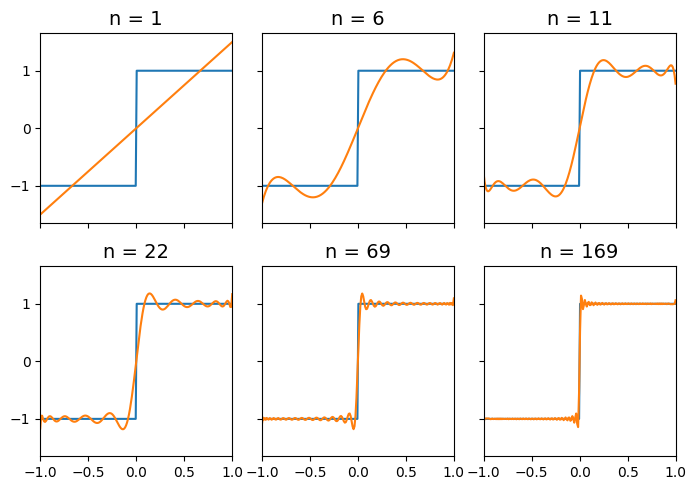

In [34]:
N = 200
polyDegrees = [1, 6, 11, 22, 69, 169]

x = np.linspace(-1, 1, N)
y = np.sign(x)

fig, axes = plt.subplots(2, 3, figsize=(7, 5),
                         sharey=True, sharex=True)
axes = axes.flatten()

for i, n in enumerate(polyDegrees):
    sgn_poly = convertSignum(n)

    axes[i].plot(x, y)
    axes[i].plot(x, sgn_poly(x))
    axes[i].set_title('n = {}'.format(n), fontsize=14)
    axes[i].set_xlim(-1, 1)

plt.tight_layout()

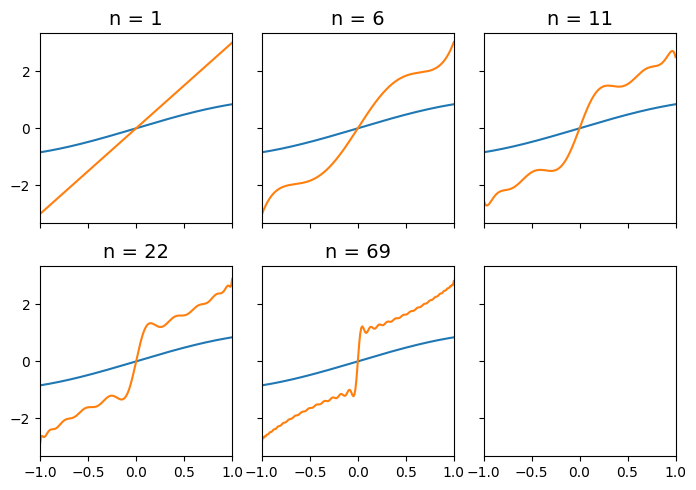

In [41]:
def convertSin(n: int) -> float:
  from sympy.abc import t
  an = np.zeros(n + 1)
  for n in np.arange(1, n + 1, 2):
    an[n] = (2*n + 1) * sp.integrate(sp.legendre_poly(n, t) * sp.exp(t), (t, 0, 1))
  return np.polynomial.Legendre(an)

N = 200
polyDegrees = [1, 6, 11, 22, 69]

x = np.linspace(-1, 1, N)
y = np.sin(x)

fig, axes = plt.subplots(2, 3, figsize=(7, 5),
                         sharey=True, sharex=True)
axes = axes.flatten()

for i, n in enumerate(polyDegrees):
    sgn_poly = convertSin(n)

    axes[i].plot(x, y)
    axes[i].plot(x, sgn_poly(x))
    axes[i].set_title('n = {}'.format(n), fontsize=14)
    axes[i].set_xlim(-1, 1)

plt.tight_layout()

Настало время научиться считать корни многочленов, чтобы применять их, например, в квадратуре Гаусса-Лежандра.

Сперва можно доказать, что полином Лежандра $P_n(x)$ имеет $n$ корней на промежутке $[-1, 1]$.

Идём сразу к делу, считаем корни с помощью итерационного метода Ньютона (метод касательных). Но для него требуется хорошее начальное приближение для каждого $i$-того корня.
$$
x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}; \quad x_0 = cos\Bigl( \pi \frac{i - 1/4}{n + 1/2} \Bigr)
$$
И после того как вычислили корень, подставляем $i$-тый корень в формулу:
$$
w_i = \frac{1}{(1 - x_i^2)(P_n'(x_i))^2}
$$

In [45]:
from typing import Tuple

def ithZeroPoly(i: int, degree: int, max_iter: int) -> Tuple[float]:
  if not(1 <= i <= degree):
    raise ValueError('i is out of range [1, degree]')
  from sympy.abc import t
  polyExpr = sp.legendre_poly(degree, t)
  diffPolyExpr = sp.diff(sp.legendre_poly(degree, t), t)

  xn = sp.cos(float(pi.evalf()) * (i - 0.25) / (degree + 0.5))
  # xn_1 = 0
  for n in range(max_iter):
    xn = xn - polyExpr.evalf(subs={t:xn}) / diffPolyExpr.evalf(subs={t:xn})

  wi = 2 / (1 - xn * xn)
  wi /= diffPolyExpr.evalf(subs={t:xn}) ** 2
  return (xn, wi)

# from sympy.abc import t
# sp.diff(sp.legendre_poly(2, t), t).evalf(subs={t:2})

deg = 7
N = 80
for i in range(1, deg + 1):
  xi, wi = ithZeroPoly(i, deg, N)
  value = lpn(deg, xi)
  # print(f"P_{deg}(x) = {value} \n at x_{i} = {xi}, w_{i} = {wi}")
  print(wi, end=', ')


0.129484966168870, 0.279705391489277, 0.381830050505119, 0.417959183673469, 0.381830050505119, 0.279705391489277, 0.129484966168870, 

Когда-нибудь рассмотрю материалы про смещённые полиномы Лежандра...

А на этом пока всё, спасибо за внимание.